# Part-1: K-means Algorithm - step-by-step implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Generate 2D data points

# num_clusters: total number of clusters to be present in the data points
# num_points: number of data points per cluster to be generated

def generate_data(num_clusters, num_points):
  np.random.seed(42)
  data = []
  for i in range(num_clusters):
    center = np.random.randn(2) * 5
    for j in range(num_points):
      point = center + np.random.randn(2)
      data.append(point)
  return np.array(data)


In [13]:
data = generate_data(3, 10)
# data.shape

c = data[0,:]
print(c)
print(c.shape)

[3.1312593  0.83170835]
(2,)


In [11]:
print(c[:, np.newaxis])
print(c[:, np.newaxis].shape)


[[3.1312593 ]
 [0.83170835]]
(2, 1)


In [6]:
# Randomly select datapoints to initialize the cluster centroids

def initialize_centroids(data, num_clusters):
   np.random.seed(42)
   indices = np.random.choice(len(data), num_clusters, replace=False)
   return data[indices]

In [7]:
# Assign each data point to the nearest centroid
def assign_to_nearest(data, centroids):
  distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
  return np.argmin(distances, axis=0)


In [19]:
# Update the centroids by taking the mean of all the data points assigned t a cluster
def update_centroids (data, labels, num_clusters):
  centroids = np.zeros((num_clusters, 2))
  for i in range(num_clusters):
    centroids[i] = np.mean(data[labels==i], axis=0)
  return centroids


In [16]:
# Runs the K-means algorithm on the given data
def k_means(data, num_clusters, num_iterations=10):
  centroids = initialize_centroids(data, num_clusters)
  for i in range(num_iterations):
    labels = assign_to_nearest(data, centroids)
    centroids = update_centroids(data, labels, num_clusters)
  return labels, centroids  


## Generate Data

In [17]:
data = generate_data(3, 50)
data.shape

(150, 2)

In [20]:
labels, centroids = k_means(data, 3)

In [21]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
centroids

array([[-1.74504698, -3.81457411],
       [ 2.30965344, -0.76898653],
       [-6.76271553, -4.69846434]])

## Plot the Data Points and the Cluster Centroids

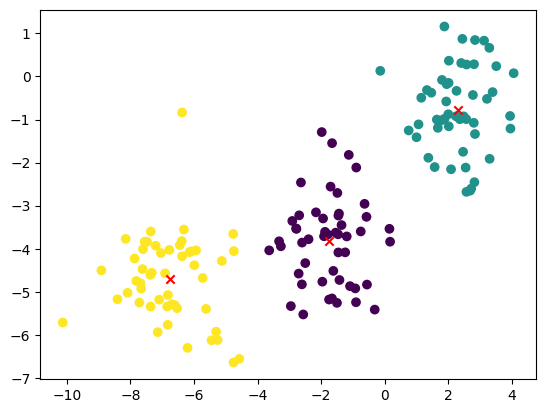

In [24]:
# Plot the data points
plt.scatter(data[:,0], data[:,1], c=labels)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()

# Part-2: K-means with Scikitlearn

In [27]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## Generate Synthetic Data

In [28]:
# Generate random data 
X, y = make_blobs(n_samples=200, centers=3, random_state=42)
X.shape

(200, 2)

## Apply K-means Algorithm

In [34]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

print(kmeans.labels_)


[0 2 1 1 1 1 2 1 0 1 0 0 0 0 0 1 2 1 0 1 0 0 1 2 1 2 2 1 2 0 0 0 1 1 2 2 1
 2 1 2 0 2 1 0 1 0 0 1 0 2 1 2 1 2 2 2 1 0 2 0 1 2 1 1 1 1 2 2 1 2 2 1 2 0
 2 0 0 2 0 2 2 0 0 1 1 1 1 2 0 1 0 2 2 2 0 1 2 0 0 2 1 1 2 1 2 0 1 0 0 1 0
 0 2 1 2 1 1 2 2 2 1 0 2 1 1 0 2 2 0 2 0 1 2 1 1 0 0 0 2 0 2 2 1 0 0 2 0 1
 1 0 2 1 0 1 0 1 1 2 0 0 2 0 0 1 2 0 0 2 1 0 1 2 0 1 2 0 2 2 2 0 2 0 1 1 1
 2 0 0 0 2 2 0 1 1 2 1 2 2 0 0]


## Cluster Centroids

In [35]:
kmeans.cluster_centers_

array([[ 4.63218228,  2.10121377],
       [-6.74539381, -6.85144337],
       [-2.65882129,  8.95756821]])

## Plot data points and the cluster centroids

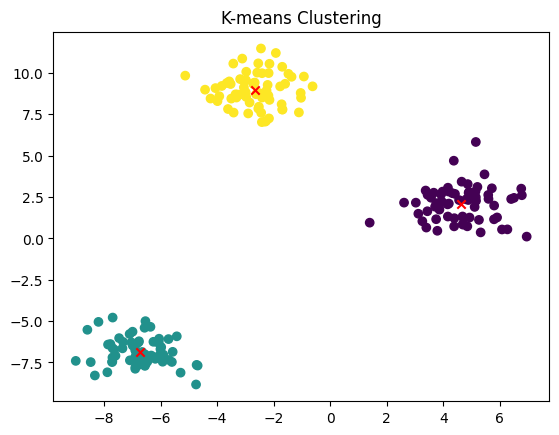

In [36]:
# Plot the data points
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
 
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('K-means Clustering')
plt.show()